In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

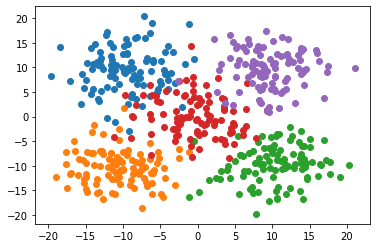

In [70]:
n_pts = 500
centers = [[-10,10], [-10,-10], [10,-10], [0,0], [10,10]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123,centers= centers, cluster_std=4)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.scatter(X[y==3,0], X[y==3,1])
plt.scatter(X[y==4,0], X[y==4,1])

Y = to_categorical(y, 5)

In [71]:
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X, y=Y, verbose=2, batch_size=5, epochs=100)

Epoch 1/100
100/100 - 0s - loss: 2.9990 - accuracy: 0.4780
Epoch 2/100
100/100 - 0s - loss: 0.4079 - accuracy: 0.8660
Epoch 3/100
100/100 - 0s - loss: 0.3293 - accuracy: 0.8880
Epoch 4/100
100/100 - 0s - loss: 0.2833 - accuracy: 0.9100
Epoch 5/100
100/100 - 0s - loss: 0.2605 - accuracy: 0.9060
Epoch 6/100
100/100 - 0s - loss: 0.2448 - accuracy: 0.9200
Epoch 7/100
100/100 - 0s - loss: 0.2294 - accuracy: 0.9240
Epoch 8/100
100/100 - 0s - loss: 0.2188 - accuracy: 0.9340
Epoch 9/100
100/100 - 0s - loss: 0.2153 - accuracy: 0.9300
Epoch 10/100
100/100 - 0s - loss: 0.2109 - accuracy: 0.9280
Epoch 11/100
100/100 - 0s - loss: 0.2082 - accuracy: 0.9320
Epoch 12/100
100/100 - 0s - loss: 0.2005 - accuracy: 0.9260
Epoch 13/100
100/100 - 0s - loss: 0.2032 - accuracy: 0.9280
Epoch 14/100
100/100 - 0s - loss: 0.1961 - accuracy: 0.9320
Epoch 15/100
100/100 - 0s - loss: 0.1951 - accuracy: 0.9280
Epoch 16/100
100/100 - 0s - loss: 0.1942 - accuracy: 0.9260
Epoch 17/100
100/100 - 0s - loss: 0.1963 - accura

[3]


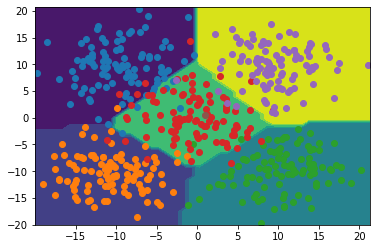

In [72]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

plot_decision_boundary(X, Y, model)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.scatter(X[y==3,0], X[y==3,1])
plt.scatter(X[y==4,0], X[y==4,1])
x= 1
y=0.5
plt.scatter([x], [y], marker='o')
pred = model.predict_classes([[x,y]])
print(pred)
